## import Libraries 

In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize 
from sklearn import preprocessing
from nltk.corpus import stopwords
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_colwidth',300)
sns.set()

## data exploration

In [2]:
df = pd.read_json('articles.json')
df.head(5)

,body,title,category
0,"Protecting Netflix Viewing Privacy at Scale\r\n\r\nOn the Open Connect team at Netflix, we are always working to enhance the hardware and software in the purpose-built Open Connect Appliances (OCAs) that store and serve Netflix video content. As we mentioned in a recent company blog post, since ...",Protecting Netflix Viewing Privacy at Scale,Engineering
1,Introducing Winston — Event driven Diagnostic and Remediation Platform\r\n\r\nNetflix is a collection of microservices that all come together to enable the product you have come to love. Operating these micro services is also distributed across the owning teams and their engineers. We do not run...,Introducing Winston - Event driven Diagnostic and Remediation Platform,Engineering
2,"Performance & Usage at Instagram\r\n\r\nAt Instagram, we treat performance as a feature, and as we build products, we constantly think about how we can make things faster and more efficient. We’ve found that improving performance can actually drive usage, and by making small changes we can also ...",Performance & Usage at Instagram,Engineering
3,"The simple example of calculating and formatting a bill for a video store opened my refactoring book in 1999. If done in modern JavaScript, there are several directions you could take the refactoring. I explore four here: refactoring to top level functions, to a nested function with a dispatcher...",Refactoring a javascript video store,Engineering
4,"Billing applications have transactions that need ACID compliance to process the payment for charged transactions. RDBMS seemed the right choice for the datastore.\r\n\r\nBilling, as most of you would agree, is the critical service for any company. The database is the most essential element in an...",Netflix Billing Migration to AWS - Part III,Engineering


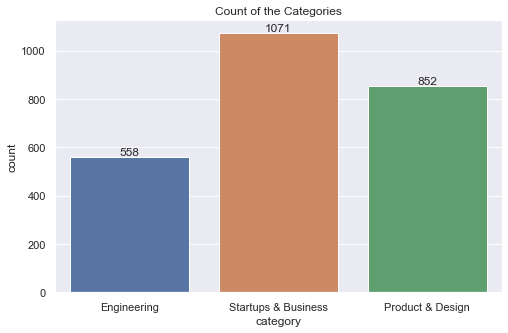

In [3]:
# count the target values
ax , fig = plt.subplots(figsize = [8,5])
ax = sns.countplot(x= 'category', data = df)
ax.bar_label(ax.containers[0]);
plt.title('Count of the Categories');

In [4]:
# see if there is any duplicated
df.duplicated().sum()

20

In [5]:
df[df.duplicated(keep = False)].tail(5)

,body,title,category
2321,"Gil Shklarski has spent his career solving incredibly complex problems. Whether it was making Facebook safer or working on infrastructure for Microsoft’s maps, he’s always approached his work with a mathematician’s ability to break enormous missions into problem sets to be solved. Five years ago...",This Matrix Helps Growing Teams Make Great Decisions,Startups & Business
2322,"If you're an ambitious person, you'll inevitably hit a wall. Sounds pessimistic, but it's actually a sign you're doing something right. At points throughout your career, you're guaranteed to feel overwhelmed, burned out, uncertain, and defeated. You're the kind of person who takes on as much as ...",Our 6 Must Reads for Scaling Yourself as a Leader,Startups & Business
2396,"Being a Good Decision Maker\n\nIntuitively, being right a lot matters. At the same time, and in contrast, there are often factors outside of our control that determine outcomes.\n\nMaybe you’re building an iOS app and then Apple changes their terms of service so your app is in breach. Maybe a la...",Making Good Decisions as a Product Manager,Product & Design
2469,"When Leslie Ziegler joined the founding team of Rock Health in 2010, she had an enormous task ahead of her: make the intimidating world of institutional health care approachable for startup founders. No matter what the firm did next, its brand was going to have to do this heavy lifting, and as a...",This Brand Strategy Can Make Your Startup Look Bigger Than It Is,Startups & Business
2473,"When Leslie Ziegler joined the founding team of Rock Health in 2010, she had an enormous task ahead of her: make the intimidating world of institutional health care approachable for startup founders. No matter what the firm did next, its brand was going to have to do this heavy lifting, and as a...",This Brand Strategy Can Make Your Startup Look Bigger Than It Is,Startups & Business


In [6]:
# investigate more in the body feature for more duplicated
df['body'].duplicated().sum()

101

In [7]:
df[df['body'].duplicated(keep = False)].tail(5)

,body,title,category
2457,"Generally speaking, we decide what to cover on the Review based on conversations we have with founders — during listening sessions, on our internal First Round Network, at conferences, and around the office. There are a few recurring themes when they talk about their needs for advice, but one bi...",Run Better Meetings with This Expert-Level Advice,Startups & Business
2469,"When Leslie Ziegler joined the founding team of Rock Health in 2010, she had an enormous task ahead of her: make the intimidating world of institutional health care approachable for startup founders. No matter what the firm did next, its brand was going to have to do this heavy lifting, and as a...",This Brand Strategy Can Make Your Startup Look Bigger Than It Is,Startups & Business
2473,"When Leslie Ziegler joined the founding team of Rock Health in 2010, she had an enormous task ahead of her: make the intimidating world of institutional health care approachable for startup founders. No matter what the firm did next, its brand was going to have to do this heavy lifting, and as a...",This Brand Strategy Can Make Your Startup Look Bigger Than It Is,Startups & Business
2474,"Netflix is a place where people win. They exceed expectations. They conquer the odds. That’s how they’ve moved as fast as the market from DVDs to streaming, capturing an audience of close to 100M paying subscribers. And it’s also why extremely high-caliber talent goes to work there. Much of this...",Humans Hate Being Spun: How to Practice Radical Honesty — from the Woman Who Defined Netflix’s Culture,Startups & Business
2480,"Netflix is a place where people win. They exceed expectations. They conquer the odds. That’s how they’ve moved as fast as the market from DVDs to streaming, capturing an audience of close to 100M paying subscribers. And it’s also why extremely high-caliber talent goes to work there. Much of this...",Humans Hate Being Spun: How to Practice Radical Honesty - from the Woman Who Defined Netflix's Culture,Startups & Business


<b>Wow! see we have many duplicated we should remove them 

<b>let's investgate more in the body feature 

In [8]:
# see the lenght of the body feature 
len_mask = df['body'].apply(lambda x : len(x)).sort_values(ascending = True)
len_mask 

1299         0
1262         0
190          0
1712         0
1503         0
         ...  
657      98037
26       98187
370      98187
23       98187
77      101262
Name: body, Length: 2481, dtype: int64

<b> ha we cought some empty bodies - good to know in the first

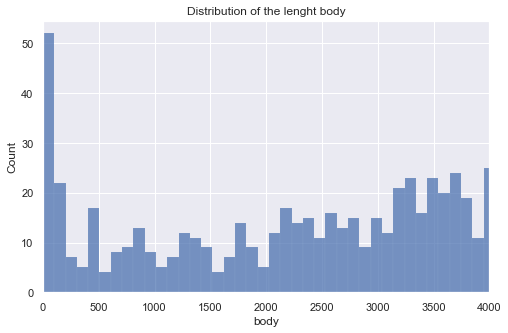

In [9]:
# plot the Distribution to find a good cut 
ax , fig = plt.subplots(figsize = [8,5])
ax = sns.histplot( len_mask  , bins = 1000)
plt.xlim(0,4000)
plt.title('Distribution of the lenght body');

In [10]:
# Search for the body feature length below the 500 Characters ( 3-4 sentenses in avg)
df[ (len_mask  < 500) ]

,body,title,category
31,,The New 'Must Haves' for Mobile Apps to Succeed Today,Startups & Business
54,You're viewing YouTube in. You can change this preference below,Jessica Livingston : How to Build the Future,Startups & Business
63,"Get access to all tutorials and screencasts Learn Enough Society members get access to all the published tutorials, all screencasts, and immediate access to new tutorials (including the full Rails 5 edition of the Rails Tutorial).",Learn Enough Git to Be Dangerous\n | Learn Enough Git to Be Dangerous | Learn Enough to Be Dangerous,Engineering
93,"26 topline marketing strategies to launch a new brand, product or service. Includes a 1 page summary outlining the pros and cons of each approach as well as best in class examples. Designed as flashcards so that it can be printed out to help stimulate brainstorm sessions.",26 Product Launch Strategies,Product & Design
109,,Neural Networks Demystified - lumiverse,Engineering
...,...,...,...
2048,,A new approach to text rendering,Engineering
2182,,Finding the Right Price for Early Customers,Startups & Business
2213,,How to implement a Customer Success strategy? Part 2,Startups & Business
2366,"Thanks for reading!\n\nIf you enjoyed it, how about getting a nice, crisp update whenever new ones come out?\n\nYour email\n\np.s. There will probably be other occasional delights like articles & videos, etc. Not too many, though, because I know you're busy.",How Duolingo Onboards New Users,Product & Design


<b>Word Cloud

In [11]:
Startup_mask = df['category'] == 'Startups & Business'
Design_mask = df['category'] == 'Product & Design'
Engineering_mask = df['category'] == 'Engineering'

Word Cloud for the Startups & Business Category 


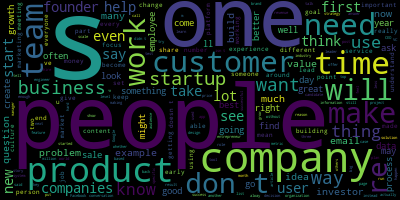

In [12]:
import wordcloud

# Join the different processed titles together.
long_string1 = " ".join(df[Startup_mask]['body'])

# Create a WordCloud object
wordcloud1 = wordcloud.WordCloud()

# Generate a word cloud
wordcloud1.generate(long_string1)
print('Word Cloud for the Startups & Business Category ')
# Visualize the word cloud
wordcloud1.to_image()


Word Cloud for the Product & Design Category 


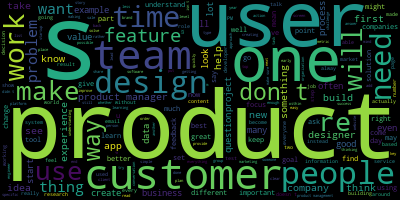

In [13]:
long_string2 = " ".join(df[Design_mask]['body'])
wordcloud2 = wordcloud.WordCloud()
wordcloud2.generate(long_string2)
print('Word Cloud for the Product & Design Category ')
wordcloud2.to_image()


Word Cloud for the Engineering Category 


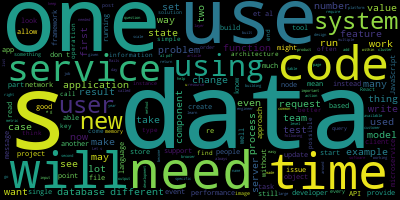

In [14]:
long_string3 = " ".join(df[Engineering_mask]['body'])
wordcloud3 = wordcloud.WordCloud()
wordcloud3.generate(long_string3)
print('Word Cloud for the Engineering Category ')
wordcloud3.to_image()

##  Data Cleaning

- remove duplicated 
- remove the empty fileds

<b> remove duplicated

In [15]:
df.shape

(2481, 3)

In [16]:
# remove the duplicated Rows
df2 = df[~df.duplicated()]

#remove the duplicated in the body feature
df2 = df2[~(df2['body'].duplicated())]
df2.shape

(2380, 3)

<b> remove the empty fileds

In [17]:
# remove for the body feature length below the 500 Characters ( 3-4 sentenses in avg)
df = df2[ ~(len_mask  < 500) ]
df.shape

(2335, 3)

##  Text Preprocessing

- Remove punctuation
- Convert all texts to be in lower case.
- Use nltk.tokenize for sentences tokenization.
- Remove stopwords from the tokenized text.
- Apply Lemmatization to the texts.

<b>Remove punctuation

In [18]:
# import punctuation from string
from string import punctuation
custom_punc = punctuation +'—' 
print(custom_punc)

def remove_punctuation(text):
    punc_free = "".join(i for i in text if i not in custom_punc)
    return punc_free

# storing the puntuation free text
df['punc_free']= df['body'].apply(remove_punctuation)
df.head(3)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~—


,body,title,category,punc_free
0,"Protecting Netflix Viewing Privacy at Scale\r\n\r\nOn the Open Connect team at Netflix, we are always working to enhance the hardware and software in the purpose-built Open Connect Appliances (OCAs) that store and serve Netflix video content. As we mentioned in a recent company blog post, since ...",Protecting Netflix Viewing Privacy at Scale,Engineering,Protecting Netflix Viewing Privacy at Scale\r\n\r\nOn the Open Connect team at Netflix we are always working to enhance the hardware and software in the purposebuilt Open Connect Appliances OCAs that store and serve Netflix video content As we mentioned in a recent company blog post since the be...
1,Introducing Winston — Event driven Diagnostic and Remediation Platform\r\n\r\nNetflix is a collection of microservices that all come together to enable the product you have come to love. Operating these micro services is also distributed across the owning teams and their engineers. We do not run...,Introducing Winston - Event driven Diagnostic and Remediation Platform,Engineering,Introducing Winston Event driven Diagnostic and Remediation Platform\r\n\r\nNetflix is a collection of microservices that all come together to enable the product you have come to love Operating these micro services is also distributed across the owning teams and their engineers We do not run a ...
2,"Performance & Usage at Instagram\r\n\r\nAt Instagram, we treat performance as a feature, and as we build products, we constantly think about how we can make things faster and more efficient. We’ve found that improving performance can actually drive usage, and by making small changes we can also ...",Performance & Usage at Instagram,Engineering,Performance Usage at Instagram\r\n\r\nAt Instagram we treat performance as a feature and as we build products we constantly think about how we can make things faster and more efficient We’ve found that improving performance can actually drive usage and by making small changes we can also improv...


<b> Convert all texts to be in lower case.


In [19]:
df['tit_lower']= df['punc_free'].apply(lambda row : row.lower())
df = df[[ 'punc_free' , 'tit_lower' , 'category']]
df.head(2)

,punc_free,tit_lower,category
0,Protecting Netflix Viewing Privacy at Scale\r\n\r\nOn the Open Connect team at Netflix we are always working to enhance the hardware and software in the purposebuilt Open Connect Appliances OCAs that store and serve Netflix video content As we mentioned in a recent company blog post since the be...,protecting netflix viewing privacy at scale\r\n\r\non the open connect team at netflix we are always working to enhance the hardware and software in the purposebuilt open connect appliances ocas that store and serve netflix video content as we mentioned in a recent company blog post since the be...,Engineering
1,Introducing Winston Event driven Diagnostic and Remediation Platform\r\n\r\nNetflix is a collection of microservices that all come together to enable the product you have come to love Operating these micro services is also distributed across the owning teams and their engineers We do not run a ...,introducing winston event driven diagnostic and remediation platform\r\n\r\nnetflix is a collection of microservices that all come together to enable the product you have come to love operating these micro services is also distributed across the owning teams and their engineers we do not run a ...,Engineering


<b> Use nltk.tokenize for sentences tokenization.


In [20]:
from nltk.tokenize import word_tokenize
df['tokenized_sents']= df['tit_lower'].apply(lambda row : word_tokenize(row))
df = df[['tit_lower', 'tokenized_sents' , 'category']]
df.head(2)

,tit_lower,tokenized_sents,category
0,protecting netflix viewing privacy at scale\r\n\r\non the open connect team at netflix we are always working to enhance the hardware and software in the purposebuilt open connect appliances ocas that store and serve netflix video content as we mentioned in a recent company blog post since the be...,"[protecting, netflix, viewing, privacy, at, scale, on, the, open, connect, team, at, netflix, we, are, always, working, to, enhance, the, hardware, and, software, in, the, purposebuilt, open, connect, appliances, ocas, that, store, and, serve, netflix, video, content, as, we, mentioned, in, a, r...",Engineering
1,introducing winston event driven diagnostic and remediation platform\r\n\r\nnetflix is a collection of microservices that all come together to enable the product you have come to love operating these micro services is also distributed across the owning teams and their engineers we do not run a ...,"[introducing, winston, event, driven, diagnostic, and, remediation, platform, netflix, is, a, collection, of, microservices, that, all, come, together, to, enable, the, product, you, have, come, to, love, operating, these, micro, services, is, also, distributed, across, the, owning, teams, and, ...",Engineering


<b> Remove stopwords from the tokenized text.


In [21]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

# defining the function for removing stop words
def remove_stopwords(text):
    stop_free = [i for i in text if i not in stopwords]
    return stop_free

df['no_stopwords'] = df['tokenized_sents'].apply(remove_stopwords)

df = df[['tokenized_sents', 'no_stopwords' , 'category']]
df.head(2)

,tokenized_sents,no_stopwords,category
0,"[protecting, netflix, viewing, privacy, at, scale, on, the, open, connect, team, at, netflix, we, are, always, working, to, enhance, the, hardware, and, software, in, the, purposebuilt, open, connect, appliances, ocas, that, store, and, serve, netflix, video, content, as, we, mentioned, in, a, r...","[protecting, netflix, viewing, privacy, scale, open, connect, team, netflix, always, working, enhance, hardware, software, purposebuilt, open, connect, appliances, ocas, store, serve, netflix, video, content, mentioned, recent, company, blog, post, since, beginning, open, connect, program, signi...",Engineering
1,"[introducing, winston, event, driven, diagnostic, and, remediation, platform, netflix, is, a, collection, of, microservices, that, all, come, together, to, enable, the, product, you, have, come, to, love, operating, these, micro, services, is, also, distributed, across, the, owning, teams, and, ...","[introducing, winston, event, driven, diagnostic, remediation, platform, netflix, collection, microservices, come, together, enable, product, come, love, operating, micro, services, also, distributed, across, owning, teams, engineers, run, central, operations, team, managing, individual, service...",Engineering


<b> Apply Lemmatization to the texts.

In [22]:
word_lemmatizer = WordNetLemmatizer()

# defining the function for lemmatization
def lemmatizer(text):
    lemm_text = [word_lemmatizer.lemmatize(word) for word in text]
    return lemm_text

df['lemmatized'] = df['no_stopwords'].apply(lemmatizer)

df= df[['no_stopwords' ,'lemmatized','category']]
df.head(2)

,no_stopwords,lemmatized,category
0,"[protecting, netflix, viewing, privacy, scale, open, connect, team, netflix, always, working, enhance, hardware, software, purposebuilt, open, connect, appliances, ocas, store, serve, netflix, video, content, mentioned, recent, company, blog, post, since, beginning, open, connect, program, signi...","[protecting, netflix, viewing, privacy, scale, open, connect, team, netflix, always, working, enhance, hardware, software, purposebuilt, open, connect, appliance, oca, store, serve, netflix, video, content, mentioned, recent, company, blog, post, since, beginning, open, connect, program, signifi...",Engineering
1,"[introducing, winston, event, driven, diagnostic, remediation, platform, netflix, collection, microservices, come, together, enable, product, come, love, operating, micro, services, also, distributed, across, owning, teams, engineers, run, central, operations, team, managing, individual, service...","[introducing, winston, event, driven, diagnostic, remediation, platform, netflix, collection, microservices, come, together, enable, product, come, love, operating, micro, service, also, distributed, across, owning, team, engineer, run, central, operation, team, managing, individual, service, av...",Engineering


<b> the final processed dataframe to be used in the next step of Model Training.

In [23]:
df['Final_text'] = df['lemmatized'].apply(lambda x : ' '.join(x))
df[['Final_text','category']].head(5)

,Final_text,category
0,protecting netflix viewing privacy scale open connect team netflix always working enhance hardware software purposebuilt open connect appliance oca store serve netflix video content mentioned recent company blog post since beginning open connect program significantly increased efficiency oca del...,Engineering
1,introducing winston event driven diagnostic remediation platform netflix collection microservices come together enable product come love operating micro service also distributed across owning team engineer run central operation team managing individual service availability instead invest tool he...,Engineering
2,performance usage instagram instagram treat performance feature build product constantly think make thing faster efficient ’ found improving performance actually drive usage making small change also improve user experience service explore one case study identifying fixing lowhanging fruit reduce...,Engineering
3,simple example calculating formatting bill video store opened refactoring book 1999 done modern javascript several direction could take refactoring explore four refactoring top level function nested function dispatcher using class transformation using intermediate data structure many year ago wr...,Engineering
4,billing application transaction need acid compliance process payment charged transaction rdbms seemed right choice datastore billing would agree critical service company database essential element migration getting right determines success failure whole project netflix cde cloud database enginee...,Engineering


## Down sampling

In [24]:
df[['category']].value_counts()

category           
Startups & Business    1001
Product & Design        820
Engineering             514
dtype: int64

In [25]:
print(df[Startup_mask].shape)
print(df[Design_mask].shape)
print(df[Engineering_mask].shape)

(1001, 4)
(820, 4)
(514, 4)


In [26]:
from sklearn.utils import resample
Design_downsample = resample(df[Design_mask],
             replace=True,
             n_samples=len(df[Engineering_mask]),
             random_state=42)

Startup_downsample = resample(df[Startup_mask],
             replace=True,
             n_samples=len(df[Engineering_mask]),
             random_state=42)
print(df[Engineering_mask].shape)
print(Design_downsample.shape)
print(Startup_downsample.shape)

(514, 4)
(514, 4)
(514, 4)


In [27]:
balanced_data = pd.concat([Startup_downsample,Design_downsample,df[Engineering_mask]] , axis = 0)
balanced_data = shuffle(balanced_data)
balanced_data = balanced_data.reset_index(drop=True)
balanced_data.shape

(1542, 4)

##  Model Training

* TfidfVectorizer
* MultinomialNB
* LogisticRegression
* LinearSVC

<b> TfidfVectorizer

In [28]:
vectorizer = TfidfVectorizer(stop_words='english',ngram_range = (1,2),max_df = .8 ,min_df = .01)  
vectArray = vectorizer.fit_transform(balanced_data['Final_text'])

In [29]:
feature_names = vectorizer.get_feature_names()
vectArray = vectArray.toarray()
vectDF = pd.DataFrame(vectArray, columns=feature_names)
vectDF

,01,05,10,10 million,10 minute,10 people,10 second,10 year,100,100 million,...,younger,youre,youtube,youve,zendesk,zero,zone,zookeeper,zoom,zuckerberg
0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.080919
2,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.012950,0.0,0.0,0.000000,0.0,0.0,0.015686,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1537,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
1538,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
1539,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
1540,0.0,0.0,0.021467,0.0,0.0,0.051496,0.0,0.0,0.013001,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000


In [30]:
X=vectDF
y=balanced_data['category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42 ,stratify =y)

In [31]:
y_train.value_counts() , y_test.value_counts()

(Engineering            360
 Product & Design       360
 Startups & Business    359
 Name: category, dtype: int64,
 Startups & Business    155
 Engineering            154
 Product & Design       154
 Name: category, dtype: int64)

<b> MultinomialNB


In [32]:
NB_tfidf=MultinomialNB()
NB_tfidf.fit(X_train, y_train)  

#Predict y value for test dataset
y_predict = NB_tfidf.predict(X_test)

#classification_report
print(classification_report(y_test , y_predict))
print('Confusion Matrix : \n' , confusion_matrix(y_test,y_predict))

                     precision    recall  f1-score   support

        Engineering       0.99      0.93      0.96       154
   Product & Design       0.87      0.90      0.89       154
Startups & Business       0.88      0.90      0.89       155

           accuracy                           0.91       463
          macro avg       0.91      0.91      0.91       463
       weighted avg       0.91      0.91      0.91       463

Confusion Matrix : 
 [[143   6   5]
 [  1 139  14]
 [  0  15 140]]


<b> LinearSVC

In [33]:
svc_tfidf=LinearSVC()
svc_tfidf.fit(X_train, y_train)  

#Predict y value for test dataset
y_predict = svc_tfidf.predict(X_test)

#classification_report
print(classification_report(y_test , y_predict))
print('Confusion Matrix : \n' , confusion_matrix(y_test,y_predict))

                     precision    recall  f1-score   support

        Engineering       0.99      0.94      0.96       154
   Product & Design       0.88      0.88      0.88       154
Startups & Business       0.88      0.92      0.90       155

           accuracy                           0.91       463
          macro avg       0.92      0.91      0.91       463
       weighted avg       0.92      0.91      0.91       463

Confusion Matrix : 
 [[145   6   3]
 [  1 136  17]
 [  1  12 142]]


<b> LogisticRegression

In [34]:
lr_tfidf=LogisticRegression()
lr_tfidf.fit(X_train, y_train)  

#Predict y value for test dataset
y_predict = lr_tfidf.predict(X_test)

#classification_report
print(classification_report(y_test , y_predict))
print('Confusion Matrix : \n' , confusion_matrix(y_test,y_predict))

                     precision    recall  f1-score   support

        Engineering       0.98      0.94      0.96       154
   Product & Design       0.89      0.87      0.88       154
Startups & Business       0.86      0.92      0.89       155

           accuracy                           0.91       463
          macro avg       0.91      0.91      0.91       463
       weighted avg       0.91      0.91      0.91       463

Confusion Matrix : 
 [[145   4   5]
 [  2 134  18]
 [  1  12 142]]


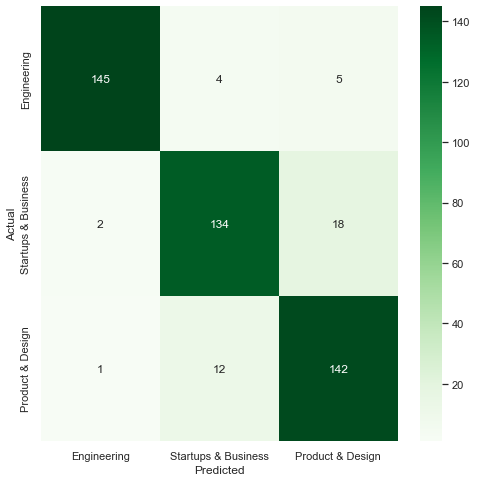

In [35]:
Conf_mat = confusion_matrix(y_test, y_predict)
labels = ['Engineering', 'Startups & Business', 'Product & Design']
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(Conf_mat, annot=True, yticklabels=labels, xticklabels=labels , fmt='d', cmap="Greens")
plt.ylabel('Actual')
plt.xlabel('Predicted');